In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy import integrate
from statsmodels.nonparametric.smoothers_lowess import lowess
from numpy.fft import fft
import statistics
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading from CSV files**

In [54]:
# Reading all CSV files into DataFrames
# Ankle
data = pd.read_csv('Data/RawData/ankle_acc/adult1_1_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/adult1_2_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/adult1_3_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/adult2_1_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/adult2_2_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/adult2_3_ankle.csv')

#data =  pd.read_csv('Data/RawData/ankle_acc/young1_1_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/young1_2_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/young1_3_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/young2_1_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/young2_2_ankle.csv')
#data =  pd.read_csv('Data/RawData/ankle_acc/young2_3_ankle.csv')


# Hand
#data =  pd.read_csv('Data/RawData/hand_acc/adult1_1_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/adult1_2_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/adult2_1_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/adult2_2_hand.csv')

#data =  pd.read_csv('Data/RawData/hand_acc/young1_1_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/young1_2_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/young1_3_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/young2_1_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/young2_2_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/young2_3_hand.csv')
#data =  pd.read_csv('Data/RawData/hand_acc/young2_4_hand.csv')


# Pocket
#data =  pd.read_csv('Data/RawData/pocket_acc/adult1_1_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/adult1_2_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/adult2_1_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/adult2_2_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/adult2_3_pocket.csv')

#data =  pd.read_csv('Data/RawData/pocket_acc/young1_1_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/young1_2_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/young2_1_pocket.csv')
#data =  pd.read_csv('Data/RawData/pocket_acc/young2_2_pocket.csv')

In [40]:
# Editing Timestamp Columns and Dropping the columns not needed
data['Timestamp'] = data['Timestamp'] - data['Timestamp'].iloc[0]
del data['DeviceOrientation']
data

,Timestamp,AccelerationX,AccelerationY,AccelerationZ,Label
0,0,-0.038086,-0.390305,-0.939743,ap
1,0,-0.030426,-0.387146,-0.913345,ap
2,0,-0.031479,-0.391205,-0.914139,ap
3,0,-0.032623,-0.393570,-0.896606,ap
4,0,-0.041962,-0.393555,-0.920746,ap
...,...,...,...,...,...
6896,277,-0.022583,-0.385864,-0.940186,ap
6897,277,-0.022507,-0.384995,-0.940781,ap
6898,277,-0.023102,-0.396988,-0.902405,ap
6899,277,-0.014618,-0.401001,-0.873795,ap


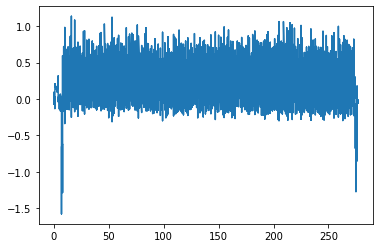

In [41]:
# Plotting Timestamp vs Acceleration(X,Y,Z)

plt.plot(data['Timestamp'],data['AccelerationX'])
#plt.plot(data['Timestamp'],data['AccelerationY'])
#plt.plot(data['Timestamp'],data['AccelerationZ'])

## **Noise Filtering using LOESS Filter**

Text(0, 0.5, 'Acceleration')

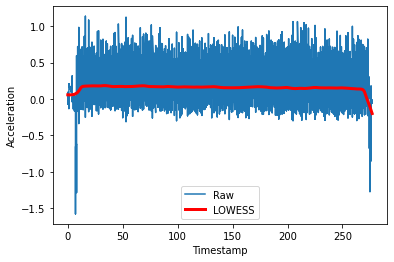

In [42]:
# Noise Filtering using LOESS Filter
loess_filt_x = lowess(data['AccelerationX'],data['Timestamp'], frac=0.05)
loess_filt_y = lowess(data['AccelerationY'],data['Timestamp'], frac=0.05)
loess_filt_z = lowess(data['AccelerationZ'],data['Timestamp'], frac=0.05)

plt_x, = plt.plot(data['Timestamp'],data['AccelerationX'], label='Raw')
plt_loess_x, = plt.plot(loess_filt_x[:,0], loess_filt_x[:, 1], 'r-', linewidth=3, label='LOWESS')
plt.legend(handles=[plt_x, plt_loess_x])
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')

#plt.plot(loess_filt_y[:,0], loess_filt_y[:, 1], 'r-', linewidth=3)
#plt.plot(loess_filt_z[:,0], loess_filt_z[:, 1], 'r-', linewidth=3)

## **Noise Filtering using a low-pass Butter Worth Filter**

Text(0, 0.5, 'Acceleration')

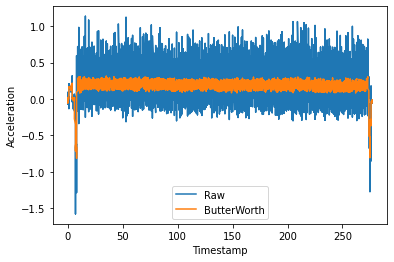

In [43]:
# Noise Filtering using Butter Worth Filter
b, a = signal.butter(3,0.1, btype='lowpass', analog=False)
low_passed_x = signal.filtfilt(b,a, data['AccelerationX'])
low_passed_y = signal.filtfilt(b,a, data['AccelerationY'])
low_passed_z = signal.filtfilt(b,a, data['AccelerationZ'])

plt_x, = plt.plot(data['Timestamp'],data['AccelerationX'], label='Raw')
plt_x_butter, = plt.plot(data['Timestamp'],low_passed_x, label='ButterWorth')
plt.legend(handles=[plt_x, plt_x_butter])
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
#plt.plot(data['Timestamp'],low_passed_y)
#plt.plot(data['Timestamp'],low_passed_z)

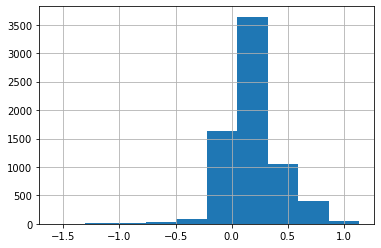

In [44]:
# Plotting Histogram of Acceleration(X,Y,Z) to visualize data

data['AccelerationX'].hist()
#data['AccelerationY'].hist()
#data['AccelerationZ'].hist()

# **Cleaning Data**
**Trimming few seconds from start and end of data collection, to account for unnecessary reading.**

In [45]:
# Cleaning Data
# Deleting rows from beginning, end and points of stoppage
# After carefult analysis, we decided to trim the first and last 5 seconds of the data
start = 5
end = 5

# Dropping values from the Filtered Data Array
low_passed_x = np.delete(low_passed_x, range(len(low_passed_x)-end*25,len(low_passed_x)))
low_passed_x = np.delete(low_passed_x, range(0,start*25))

low_passed_y = np.delete(low_passed_y, range(len(low_passed_y)-end*25,len(low_passed_y)))
low_passed_y = np.delete(low_passed_y, range(0,start*25))

low_passed_z = np.delete(low_passed_z, range(len(low_passed_z)-end*25,len(low_passed_z)))
low_passed_z = np.delete(low_passed_z, range(0,start*25))

In [46]:
# Dropping rows from the DataFrame and resetting index
data = data.drop(data.index[len(data)-end*25:])
data = data.drop(data.index[:start*25])

data = data.reset_index(drop='True')

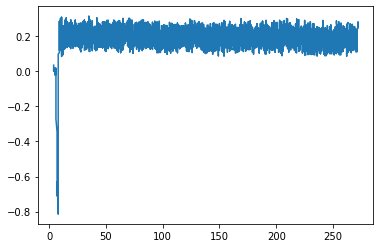

In [47]:
# Plotting Timestamp vs ButterWorth Filtered Data
plt.plot(data['Timestamp'],low_passed_x)
#plt.plot(data['Timestamp'],low_passed_y)
#plt.plot(data['Timestamp'],low_passed_z)

In [48]:
# Determining the interval of the walk
interval = data['Timestamp'].max() - data['Timestamp'].min()
interval

268

In [49]:
# Passing the Filtered values to the DataFrame and deleting unwanted columns

data['AccCleanX'] = low_passed_x
data['AccCleanY'] = low_passed_y
data['AccCleanZ'] = low_passed_z

del data['AccelerationX']
del data['AccelerationY']
del data['AccelerationZ']

# Editing Timestamp, due to inconsistency caused by Cleaning Data
data['Timestamp'] = data['Timestamp'] - data['Timestamp'].min()

data

,Timestamp,Label,AccCleanX,AccCleanY,AccCleanZ
0,0,ap,0.033359,-0.345001,-0.940412
1,0,ap,0.020237,-0.333048,-0.947719
2,0,ap,0.010644,-0.325261,-0.952129
3,0,ap,0.004309,-0.321156,-0.954064
4,0,ap,0.000789,-0.320082,-0.954029
...,...,...,...,...,...
6646,268,ap,0.278535,0.943819,0.256712
6647,268,ap,0.278701,0.949083,0.222963
6648,268,ap,0.273800,0.951163,0.189439
6649,268,ap,0.263915,0.950897,0.158704


In [50]:
# Re-arranging the columns
columns = ['Label','Timestamp','AccCleanX', 'AccCleanY', 'AccCleanZ']
data = data[columns]
data

,Label,Timestamp,AccCleanX,AccCleanY,AccCleanZ
0,ap,0,0.033359,-0.345001,-0.940412
1,ap,0,0.020237,-0.333048,-0.947719
2,ap,0,0.010644,-0.325261,-0.952129
3,ap,0,0.004309,-0.321156,-0.954064
4,ap,0,0.000789,-0.320082,-0.954029
...,...,...,...,...,...
6646,ap,268,0.278535,0.943819,0.256712
6647,ap,268,0.278701,0.949083,0.222963
6648,ap,268,0.273800,0.951163,0.189439
6649,ap,268,0.263915,0.950897,0.158704


## **Calculating Net Acceleration**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


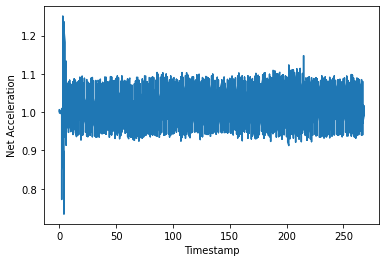

1.0091665619917103
268


In [51]:
# Calculating Net Acceleration
data['AccSum'] = data['AccCleanX'].pow(2) + data['AccCleanY'].pow(2) + data['AccCleanZ'].pow(2)
data['AccNet'] = data['AccSum'].pow(0.5)
del data['AccSum']

# Plotting Time vs Net Acceleration
plt.plot(data['Timestamp'],data['AccNet'])
plt.xlabel('Timestamp')
plt.ylabel('Net Acceleration')
plt.show()
print(data['AccNet'].mean())
print(interval)

## **Fourier Transformation**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Fourier Transformed Data')

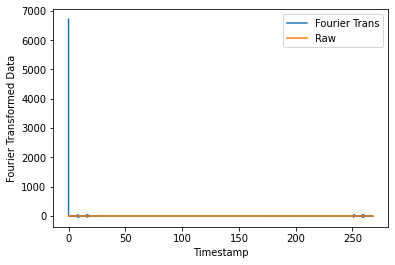

In [52]:
# Fourier Transformation
data_fft = fft(data['AccNet'])
plt_fft, = plt.plot(data['Timestamp'],data_fft, label="Fourier Trans")
plt_raw, = plt.plot(data['Timestamp'],data['AccNet'], label="Raw")
plt.legend(handles=[plt_fft, plt_raw])
plt.xlabel('Timestamp')
plt.ylabel('Fourier Transformed Data')
# But it did not work out as expected, so we decided not to use it

In [53]:
# Grouping Data by Timestamp, to make data CONCISE, so that we have one value of acceleration per second of the interval
# We averaged the values in that particular timestamp
data = data.groupby(data['Timestamp'], as_index=False).mean()
data['Label'] = 'aa'
#data['Label'] = 'ya'
#data['Label'] = 'ah'
#data['Label'] = 'yh'
#data['Label'] = 'ap'
#data['Label'] = 'yp'
data

,Timestamp,AccCleanX,AccCleanY,AccCleanZ,AccNet,Label
0,0,0.008650,-0.330525,-0.946815,1.002975,ah
1,1,-0.001586,-0.356907,-0.933487,0.999600,ah
2,2,-0.033715,-0.165746,-0.877262,0.921064,ah
3,3,-0.584786,0.844391,-0.324035,1.090866,ah
4,4,-0.404054,0.724294,0.010543,0.946154,ah
...,...,...,...,...,...,...
264,264,0.185264,0.972176,0.155082,1.009547,ah
265,265,0.199739,0.943189,0.189603,0.989263,ah
266,266,0.179980,0.975797,0.171047,1.016729,ah
267,267,0.170637,0.984023,0.118856,1.011389,ah


Writing to CSV Files

In [23]:
# Writing Cleaned Data to CSV Files

# Ankle: Adult
data.to_csv('Data/CleanData/ankle_clean/adult1_1_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/adult1_2_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/adult1_3_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/adult2_1_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/adult2_2_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/adult2_3_ankle_c.csv', index=False)

# Ankle: Young
#data.to_csv('Data/CleanData/ankle_clean/young1_1_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/young1_2_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/young1_3_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/young2_1_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/young2_2_ankle_c.csv', index=False)
#data.to_csv('Data/CleanData/ankle_clean/young2_3_ankle_c.csv', index=False)


# Hand: Adult
#data.to_csv('Data/CleanData/hand_clean/adult1_1_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/adult1_2_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/adult2_1_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/adult2_2_hand_c.csv', index=False)

# Hand: Young
#data.to_csv('Data/CleanData/hand_clean/young1_1_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/young1_2_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/young1_3_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/young2_1_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/young2_2_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/young2_3_hand_c.csv', index=False)
#data.to_csv('Data/CleanData/hand_clean/young2_4_hand_c.csv', index=False)


# Pocket: Adult
#data.to_csv('Data/CleanData/pocket_clean/adult1_1_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/adult1_2_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/adult2_1_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/adult2_2_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/adult2_3_pocket_c.csv', index=False)

# Pocket: Young
#data.to_csv('Data/CleanData/pocket_clean/young1_1_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/young1_2_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/young2_1_pocket_c.csv', index=False)
#data.to_csv('Data/CleanData/pocket_clean/young2_2_pocket_c.csv', index=False)